<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

/Users/happyelements/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/happyelements/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/happyelements/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Before (891, 12) (418, 11) (891, 12) (418, 11)


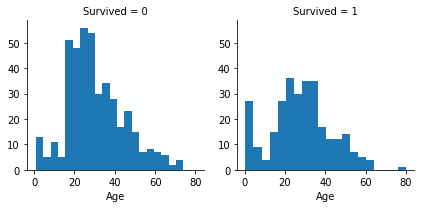

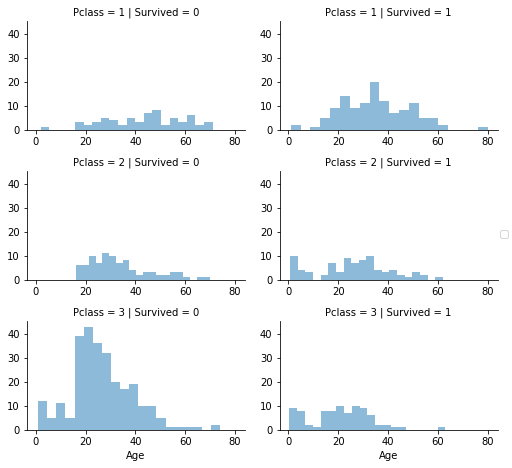

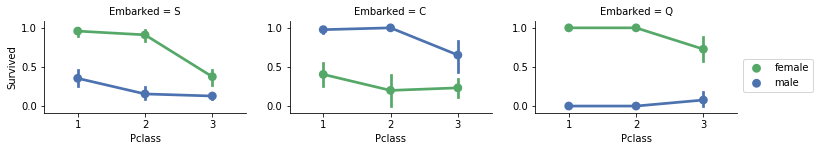

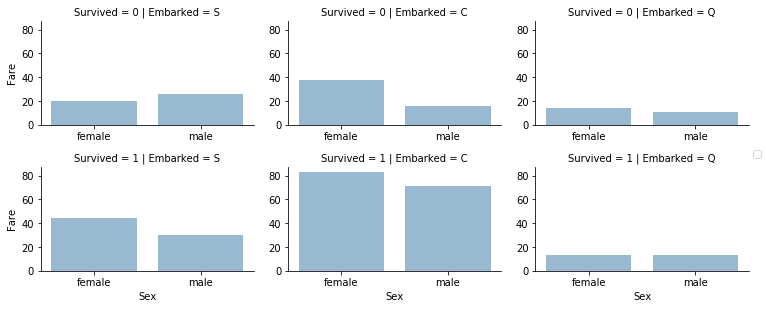

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from CleanData import train_df,test_df

import tensorflow as tf
import numpy as np 
from sklearn import metrics

In [2]:
X_train = train_df.drop("Survived", axis=1).as_matrix()
Y_train = train_df["Survived"].as_matrix()
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 8), (891,), (418, 8))

In [3]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=8)]
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                              hidden_units=[1024, 500, 50],
                                              n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_evaluation_master': '', '_save_checkpoints_steps': None, '_num_worker_replicas': 0, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_environment': 'local', '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_task_type': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1ac5ca20>, '_model_dir': '/var/folders/k6/3cfh6bpj7399mk7dlg95fzqc0000gn/T/tmpuhffnmv8', '_log_step_count_steps': 100, '_task_id': 0, '_save_summary_steps': 100}


In [4]:
def get_train_inputs():
    x = tf.constant(X_train)
    y = tf.constant(Y_train)
    return x, y
def train():
    classifier.fit(input_fn=get_train_inputs, steps=2000)

train()

Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/k6/3cfh6bpj7399mk7dlg95fzqc0000gn/T/tmpuhffnmv8/model.ckpt.
INFO:tensorflow:loss = 0.670775, step = 1
INFO:tensorflow:global_step/sec: 25.7603
INFO:tensorflow:loss = 0.450106, step = 101 (3.884 sec)
INFO:tensorflow:global_step/sec: 25.7969
INFO:tensorflow:loss = 0.414354, step = 201 (3.876 sec)
INFO:tensorflow:global_step/sec: 25.816
INFO:tensorflow:loss = 0.398972, step = 301 (3.873 sec)
INFO:tensorflow:global_step/sec: 25.3627
INFO:tensorflow:loss = 0.391929, step = 401 (3.943 sec)
INFO:tensorflow:global_step/sec: 24.6477
INFO:tensorflow:loss = 0.392107, step = 501 (4.057 sec)
INFO:tensorflow:global_step/sec: 23.7309
INFO:tensorflow:loss = 0.386653, step = 601 (4.214 sec)
INFO:tensorflow:global_step/sec: 23.2563
INFO:tensorflow:loss = 0.374381, step = 701 (4.300 sec)
INFO:tensorflow:global_step/sec: 23.1105
INFO:te

In [5]:
accuracy_score = classifier.evaluate(input_fn=get_train_inputs,
                                       steps=1)["accuracy"]
print("accuracy:",accuracy_score)

INFO:tensorflow:Starting evaluation at 2018-01-17-07:42:32
INFO:tensorflow:Restoring parameters from /var/folders/k6/3cfh6bpj7399mk7dlg95fzqc0000gn/T/tmpuhffnmv8/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-01-17-07:42:33
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.86532, accuracy/baseline_label_mean = 0.383838, accuracy/threshold_0.500000_mean = 0.86532, auc = 0.924312, auc_precision_recall = 0.90818, global_step = 2000, labels/actual_label_mean = 0.383838, labels/prediction_mean = 0.3663, loss = 0.323157, precision/positive_threshold_0.500000_mean = 0.872483, recall/positive_threshold_0.500000_mean = 0.760234
accuracy: 0.86532
